# T3.2 / N2 e Presença em aulas: 25, 26 e 27

In [2]:
import pandas as pd
import numpy as np

## 1 - Determine, para variável (Y):

### 1.1 -  A distribuição de frequência por classes;

In [3]:
# Recuperamos os dados
dados = pd.read_csv('./Dados semana 1 a 20 - Covid 2021 - Página1.csv')

In [4]:
# Vamos mostrar os primeiros 5 dados:
dados.head()

,Semana,Casos,Obitos
0,1,359593,6906
1,2,379061,6665
2,3,361195,7149
3,4,360721,7500
4,5,320820,7067


In [5]:
# Dividimos as classes => Raiz de Quantidade Total (N) para N >= 25
n = len(dados.Obitos)
k = sqrt(n) if n >= 25 else 5
print(f'Teremos {k} Classes.')

Teremos 5 Classes.


In [6]:
value = dados.Obitos.min()
classes = []
toAdd = (dados.Obitos.max() - dados.Obitos.min()) / k
while value <= dados.Obitos.max():
    classes.append((value, value + toAdd))
    value += toAdd
print('Classes retiradas', classes)

Classes retiradas [(6665, 9560.2), (9560.2, 12455.400000000001), (12455.400000000001, 15350.600000000002), (15350.600000000002, 18245.800000000003), (18245.800000000003, 21141.000000000004)]


In [7]:
# Item de classes
Y_freq = [] # (min, max, classes)
for min, max in classes:
    item_classe = dados.Obitos.loc[(dados.Obitos >= min) & (dados.Obitos < max)]
    Y_freq.append((min, max, item_classe.values))

In [91]:
freq_data = {'Classe':[], 'Itens': [], 'Frequencia_Absoluta': [], 'Frequencia_Relativa': []}
freq_data_2 = {'Classe_min':[], 'Classe_max':[], 'Itens': [], 'Frequencia_Absoluta': [], 'Frequencia_Relativa': []}
for min, max, items in Y_freq:
    freq_data['Classe'].append(f'[{int(min)}-{int(max)}[')
    freq_data['Itens'].append(items)
    freq_data['Frequencia_Absoluta'].append(len(items))
    freq_data['Frequencia_Relativa'].append((len(items) / len(dados.Obitos)) * 100)

    freq_data_2['Classe_min'].append(int(min))
    freq_data_2['Classe_max'].append(int(max))
    freq_data_2['Itens'].append(items)
    freq_data_2['Frequencia_Absoluta'].append(len(items))
    freq_data_2['Frequencia_Relativa'].append((len(items) / len(dados.Obitos)) * 100)

    
freq_dataframe_2 = pd.DataFrame(freq_data_2)

print('A FrequÊncia da variável Y (óbitos) se dá por:')
freq_dataframe = pd.DataFrame(freq_data)
freq_dataframe

A FrequÊncia da variável Y (óbitos) se dá por:


,Classe,Itens,Frequencia_Absoluta,Frequencia_Relativa
0,[6665-9560[,"[6906, 6665, 7149, 7500, 7067, 7520, 7445, 8244]",8,40.0
1,[9560-12455[,[10104],1,5.0
2,[12455-15350[,"[12766, 14879, 13399, 13493]",4,20.0
3,[15350-18245[,"[15661, 17798, 17814, 16945]",4,20.0
4,[18245-21141[,"[19643, 21141, 20344]",3,15.0


###  1.2 - Os gráficos: Histograma e Polígono de Frequências simples;

#### Histograma:

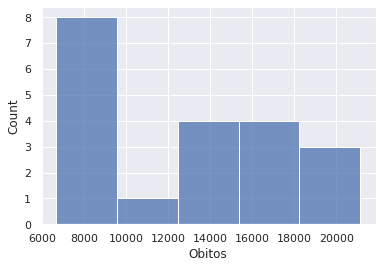

In [12]:
# Importar a biblioteca para desenho dos gráficos
import seaborn as srn
import matplotlib.pyplot as plt

srn.set(style="darkgrid")
srn_plot = srn.histplot(dados.Obitos,  bins =5)
# plt.plot(freq_dataframe.Classe, freq_dataframe.Frequencia_Absoluta)

#### Polígono de de Frequências Simples

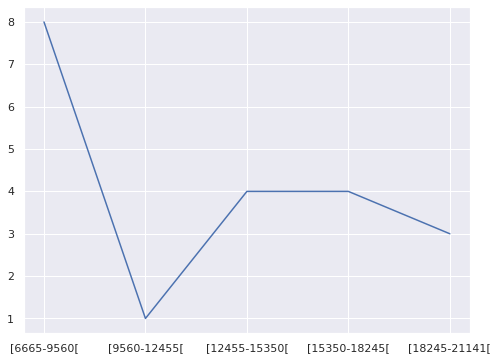

In [23]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8, 6))
plt.plot(freq_dataframe.Classe, freq_dataframe.Frequencia_Absoluta)

### 1.3 - Os parâmetros: média, mediana, moda, variância, desvio padrão e Coeficiente de variação: 

#### 1.3.1 - Considerando os dados não agrupados em distribuição de frequência por classes;

In [135]:
# Criação das funções para fazer o cálculo posterior:
import functools
import math

def funcao_mediana(arr = []):
    new_arr = [*arr]
    new_arr.sort()
    return new_arr[len(new_arr) // 2]

def funcao_moda(arr = []):
    new_Arr = [*arr]
    new_Arr.sort()
    mapper = {}
    for item in new_Arr:
        if mapper.get(item) == None: mapper[item] = 0
        mapper[item] = mapper[item] + 1
    toReturn = ('Nenhum Valor Se repete mais de uma vez', 1)
    for value, repetions in mapper.items():
        if repetions > toReturn[1]: toReturn = (value, repetions)
    return toReturn[0]

def funcao_media(arr = []): 
    tam = len(arr)
    return (sum(arr) / tam) if tam > 0 else 0

def funcao_variancia(arr= []):
    if len(arr) == 0: return 0
    
    media_arr = funcao_media(arr)
    arr_2 = arr**2
    media_arr_2 = funcao_media(arr_2)

    var = media_arr_2 - media_arr**2
    return var

def funcao_desvio_padrao(arr = []): return math.sqrt(funcao_variancia(arr))

def funcao_coeficiente_variacao(arr = []): return (funcao_desvio_padrao(arr) / funcao_media(arr))*100 

In [136]:
valores_obitos = dados.Obitos.values

print('A Média dos Óbitos é:', funcao_media(valores_obitos))
print('A Mediana dos Óbitos é:', funcao_mediana(valores_obitos))
print('A Moda dos Óbitos é:', funcao_moda(valores_obitos))
print('A Variância dos Óbitos é:', funcao_variancia(valores_obitos))
print('O Desvio Padrão dos Óbitos é:', funcao_desvio_padrao(valores_obitos))
print('O Coeficiente de Variação dos Óbitos é:', funcao_coeficiente_variacao(valores_obitos))

A Média dos Óbitos é: 12624.15
A Mediana dos Óbitos é: 13399
A Moda dos Óbitos é: Nenhum Valor Se repete mais de uma vez
A Variância dos Óbitos é: 25159496.127499998
O Desvio Padrão dos Óbitos é: 5015.924254561665
O Coeficiente de Variação dos Óbitos é: 39.73276818290075


#### 1.3.2 -  Considerando os dados agrupados em distribuição de frequência por classes; 

In [93]:
# Recupearamos os dados da Frequência de Classificações
freq_dataframe

,Classe,Itens,Frequencia_Absoluta,Frequencia_Relativa
0,[6665-9560[,"[6906, 6665, 7149, 7500, 7067, 7520, 7445, 8244]",8,40.0
1,[9560-12455[,[10104],1,5.0
2,[12455-15350[,"[12766, 14879, 13399, 13493]",4,20.0
3,[15350-18245[,"[15661, 17798, 17814, 16945]",4,20.0
4,[18245-21141[,"[19643, 21141, 20344]",3,15.0


Vamos Observar esses dados para cada Classe: 

In [137]:
freq_params = {'Classe':[], 'Media': [], 'Mediana': [], 'Moda':[], 'Variancia': [], 'Desvio_Padrao':[], 'Coeficiente_de_Variação':[]}
for index, classe in enumerate(freq_dataframe.Classe):
    items = freq_dataframe.Itens[index]
    freq_params['Classe'].append(classe)
    freq_params['Media'].append(funcao_media(items))
    freq_params['Mediana'].append(funcao_mediana(items))
    freq_params['Moda'].append(funcao_moda(items))
    freq_params['Variancia'].append(funcao_variancia(items))
    freq_params['Desvio_Padrao'].append(funcao_desvio_padrao(items))
    freq_params['Coeficiente_de_Variação'].append(funcao_coeficiente_variacao(items))

freq_params_dataframe = pd.DataFrame(freq_params)
freq_params_dataframe

,Classe,Media,Mediana,Moda,Variancia,Desvio_Padrao,Coeficiente_de_Variação
0,[6665-9560[,7312.00,7445,Nenhum Valor Se repete mais de uma vez,204370.000000,452.073003,6.182618
1,[9560-12455[,10104.00,10104,Nenhum Valor Se repete mais de uma vez,0.000000,0.000000,0.000000
2,[12455-15350[,13634.25,13493,Nenhum Valor Se repete mais de uma vez,594638.687500,771.128191,5.655817
3,[15350-18245[,17054.50,17798,Nenhum Valor Se repete mais de uma vez,770866.250000,877.989892,5.148142
4,[18245-21141[,20376.00,20344,Nenhum Valor Se repete mais de uma vez,374512.666667,611.974400,3.003408
